In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data\20200323-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,81601,103,3276,9,Local transmission,0
1,Republic of Korea,8961,64,111,7,Local transmission,0
2,Australia,1396,315,7,0,Local transmission,0
3,Malaysia,1306,123,10,7,Local transmission,0
4,Japan,1089,43,41,5,Local transmission,0
...,...,...,...,...,...,...,...
186,Niger,1,0,0,0,Imported cases only,3
187,Uganda,1,0,0,0,Imported cases only,1
188,Réunion,64,17,0,0,Under investigation,0
189,Mayotte,14,3,0,0,Imported cases only,0


In [2]:
death_rate = df['Total Deaths']/df['Total Confirmed']*100
df['Death Rate'] = death_rate
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,81601,103,3276,9,Local transmission,0,4.014657
1,Republic of Korea,8961,64,111,7,Local transmission,0,1.238701
2,Australia,1396,315,7,0,Local transmission,0,0.501433
3,Malaysia,1306,123,10,7,Local transmission,0,0.765697
4,Japan,1089,43,41,5,Local transmission,0,3.764922
...,...,...,...,...,...,...,...,...
186,Niger,1,0,0,0,Imported cases only,3,0.000000
187,Uganda,1,0,0,0,Imported cases only,1,0.000000
188,Réunion,64,17,0,0,Under investigation,0,0.000000
189,Mayotte,14,3,0,0,Imported cases only,0,0.000000


In [3]:
countries_infected = len(df)-1 # minus one because the cruiser Diamond Princess has its own row/menos um porque o cruzeiro Diamond Princess tem direito à sua própria linha
countries_infected

190

In [4]:
df = df.sort_values(by=['Death Rate'],ascending=False)
df[0:30]


,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
101,Sudan,2,0,1,0,Imported cases only,1,50.000000
146,Curaçao,3,0,1,0,Imported cases only,6,33.333333
145,Cayman Islands,3,0,1,0,Imported cases only,3,33.333333
128,Guyana,5,0,1,0,Local transmission,4,20.000000
169,Gabon,6,3,1,0,Imported cases only,0,16.666667
49,San Marino,151,0,20,0,Local transmission,2,13.245033
78,Indonesia,514,64,48,10,Local transmission,0,9.338521
17,Italy,59138,5560,5476,649,Local transmission,0,9.259698
93,Iraq,233,19,20,3,Local transmission,0,8.583691
152,Algeria,201,107,17,2,Local transmission,0,8.457711


In [5]:
minimum_number_cases = 1000
df = df[df['Total Confirmed'] > minimum_number_cases]
df = df.reset_index(drop=True)
df.index = np.arange(1, (len(df)+1))

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,59138,5560,5476,649,Local transmission,0,9.259698
2,Iran (Islamic Republic\rof),21638,1028,1685,129,Local transmission,0,7.787226
3,Spain,28572,3646,1720,394,Local transmission,0,6.019880
4,The United Kingdom,5687,669,281,48,Local transmission,0,4.941094
5,France,15821,1525,674,112,Local transmission,0,4.260161
6,Netherlands,4204,573,179,43,Local transmission,0,4.257850
7,China,81601,103,3276,9,Local transmission,0,4.014657
8,Japan,1089,43,41,5,Local transmission,0,3.764922
9,Turkey,1236,289,30,9,Local transmission,0,2.427184
10,Belgium,3401,586,75,8,Local transmission,0,2.205234


In [6]:
df.replace(to_replace=['Iran (Islamic Republic\rof)','United States of\rAmerica'],
           value= ['Iran','United States of America'], 
           inplace=True)

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,59138,5560,5476,649,Local transmission,0,9.259698
2,Iran,21638,1028,1685,129,Local transmission,0,7.787226
3,Spain,28572,3646,1720,394,Local transmission,0,6.019880
4,The United Kingdom,5687,669,281,48,Local transmission,0,4.941094
5,France,15821,1525,674,112,Local transmission,0,4.260161
6,Netherlands,4204,573,179,43,Local transmission,0,4.257850
7,China,81601,103,3276,9,Local transmission,0,4.014657
8,Japan,1089,43,41,5,Local transmission,0,3.764922
9,Turkey,1236,289,30,9,Local transmission,0,2.427184
10,Belgium,3401,586,75,8,Local transmission,0,2.205234


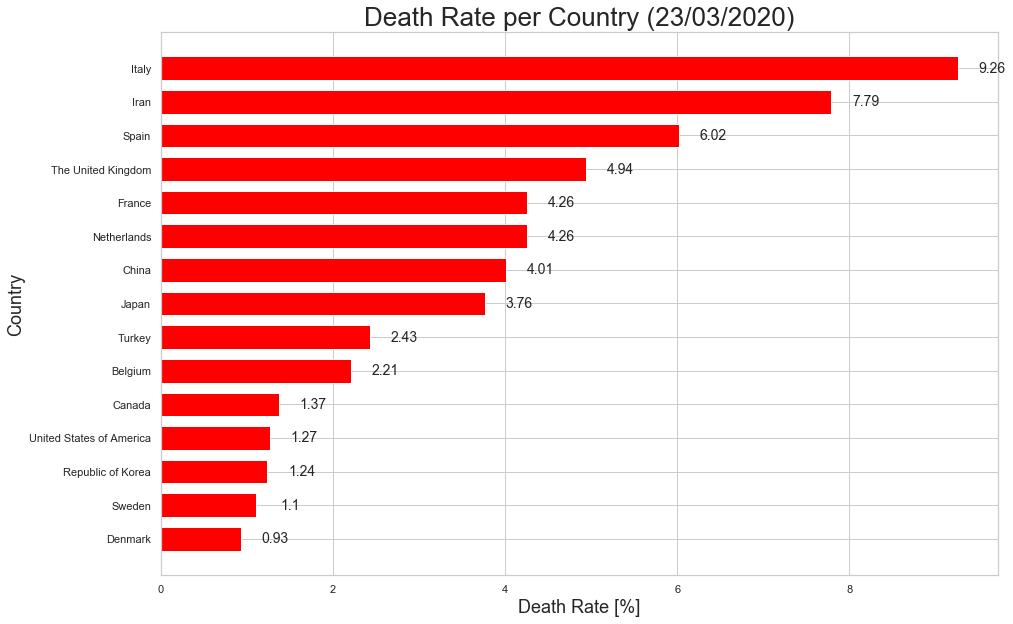

In [7]:
sns.set(style="whitegrid")
top15_deathrate = df[0:15]
death_rate = top15_deathrate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']


plt.figure(figsize=(15,10))
plt.barh(top15_deathrate['Country/Territory'],top15_deathrate['Death Rate'],height=0.7, color='red')
plt.title('Death Rate per Country (23/03/2020)',fontsize=26)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

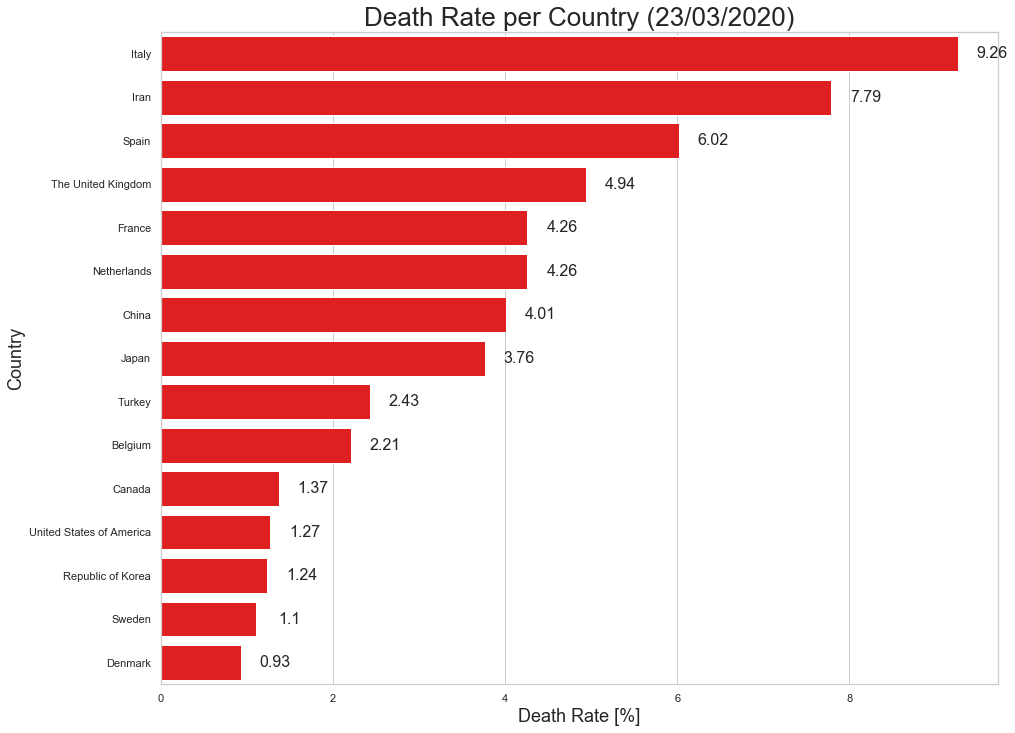

In [8]:
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_deathrate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (23/03/2020)',fontsize=26)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('20200323_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


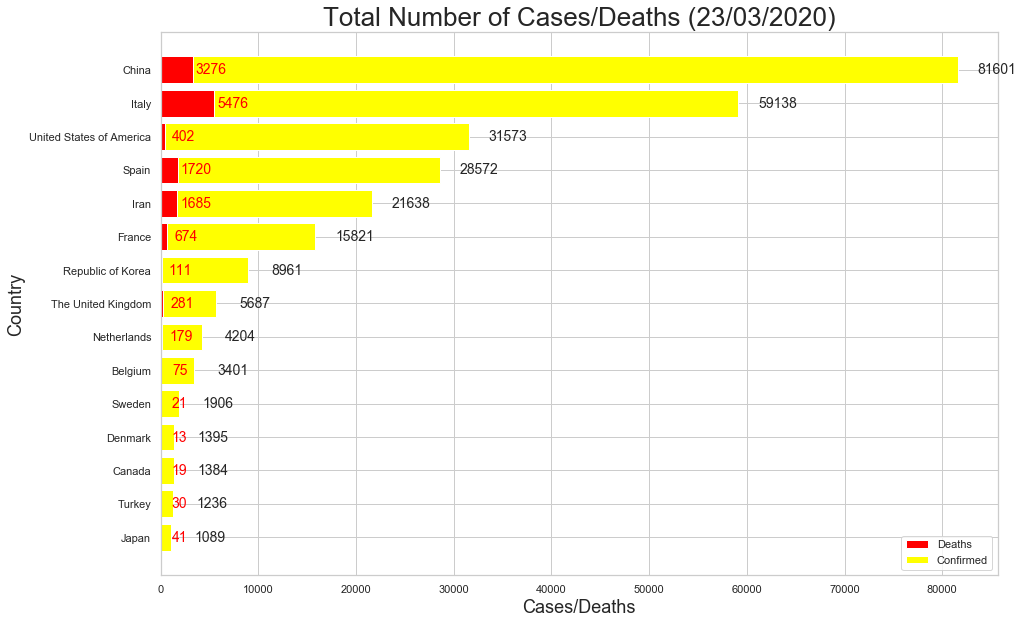

In [9]:
top15_confirmed = top15_deathrate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

plt.figure(figsize=(15,10))
p1 = plt.barh(countries,deaths, color='red')
p2 = plt.barh(countries,diference,left=deaths, color='yellow')
plt.title('Total Number of Cases/Deaths (23/03/2020)',fontsize=26)
plt.xlabel('Cases/Deaths',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.legend((p1[0], p2[0]), ('Deaths', 'Confirmed'), loc='lower right')
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

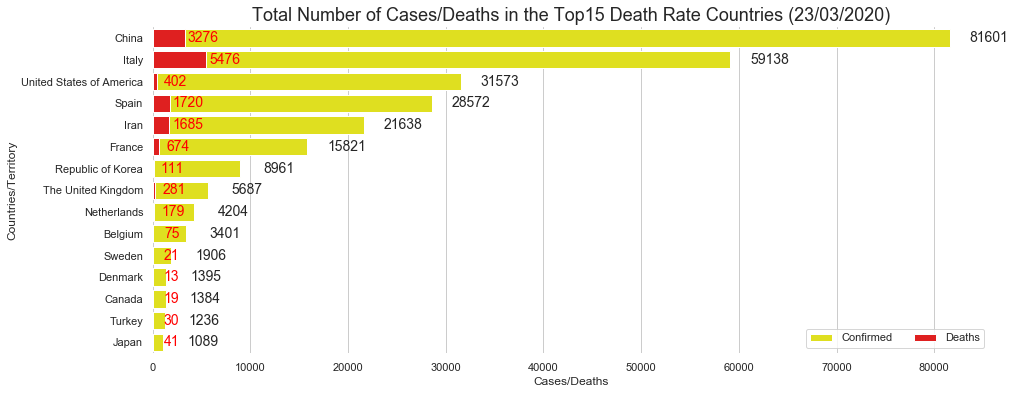

In [11]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (23/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('20200323_TotalNumberCasesDeaths.png', bbox_inches='tight')